In [1]:
from pylab import *
from numpy import *
from PIL import Image

from PCV.localdescriptors import sift

In [2]:
"""
The code from the book PDF does not work.
Cannot generate .sift file from process_image method
"""

"""
imname = './resources/empire.jpg'
im1 = array(Image.open(imname).convert('L'))
sift.process_image(imname, 'empire.sift')
l1, d1 = sift.read_features_from_file('empire.sift')

figure()
gray()
sift.plot_features(im1,l1,circle=True)
show()
"""

"\nimname = './resources/empire.jpg'\nim1 = array(Image.open(imname).convert('L'))\nsift.process_image(imname, 'empire.sift')\nl1, d1 = sift.read_features_from_file('empire.sift')\n\nfigure()\ngray()\nsift.plot_features(im1,l1,circle=True)\nshow()\n"

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

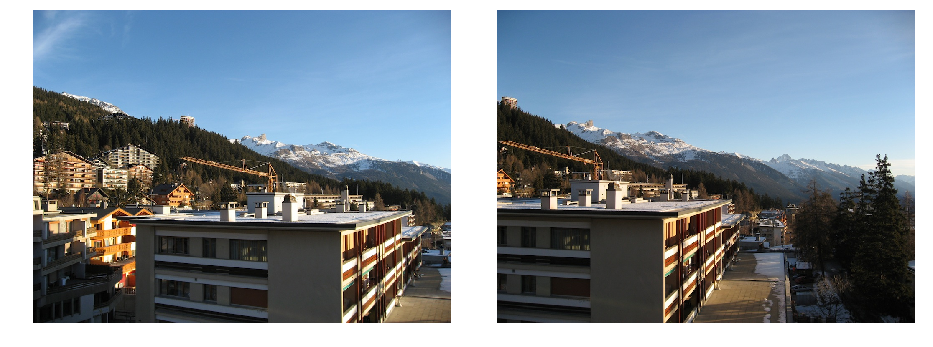

In [4]:
def show_rgb_img(img):
    plt.tight_layout()
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

image1 = cv2.imread('./resources/crans_1_small.jpg')
image2 = cv2.imread('./resources/crans_2_small.jpg')

fig = plt.figure(figsize=(13, 9))

fig.add_subplot(1,2,1)
plt.axis('off')
show_rgb_img(image1);

fig.add_subplot(1,2,2)
plt.axis('off')
show_rgb_img(image2);

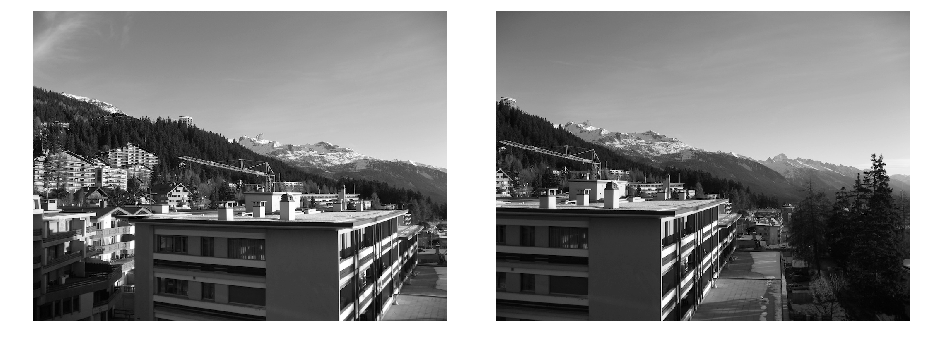

In [5]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

fig = plt.figure(figsize=(13, 9))

image1_gray = to_gray(image1)
image2_gray = to_gray(image2)

fig.add_subplot(1,2,1)
plt.axis('off')
plt.imshow(image1_gray, cmap='gray');

fig.add_subplot(1,2,2)
plt.axis('off')
plt.imshow(image2_gray, cmap='gray');

plt.tight_layout()

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('./resources/crans_1_small.jpg',0) # queryImage
img2 = cv2.imread('./resources/crans_2_small.jpg',0) # trainImage

# Initiate SIFT detector
orb = cv2.xfeatures2d.SIFT_create()
#orb = cv2.ORB()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [7]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)

plt.imshow(img3),plt.show()

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\core\src\batch_distance.cpp:245: error: (-215:Assertion failed) (type == 0 && dtype == 4) || dtype == 5 in function 'cv::batchDistance'
